In [1]:
#import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing import image
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.utils.data_utils import GeneratorEnqueuer
from imageai.Detection import ObjectDetection
from PIL import Image
import math,os
import glob
import time
import cv2
%matplotlib inline

c:\users\ani\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Import pretrained weights from inceptionresnet V2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
model = InceptionResNetV2(weights='imagenet')
print("Inception ResNet V2 model loaded")

Inception ResNet V2 model loaded


In [3]:
#model to load each image, pre-process it and predict
def model_predict(images):
    #predictions.clear()
    for i in range(len(images)):
        images[i] = image.load_img(images[i], target_size=(224, 224))
        imagecopy = images[i].copy()
        images[i] = image.img_to_array(images[i])
        x = preprocess_input(np.expand_dims(images[i].copy(), axis=0))
        preds = model.predict(x)
        predictions = (decode_predictions(preds, top=1))
        
        #Display the picture and its predicted label
        display_pipeline(imagecopy,predictions)

In [4]:
def display_pipeline(imgcpy,predictions):
    plt.imshow(imgcpy)
    plt.show()
    print(predictions)

In [5]:
#Import image directory files
image_path = 'input_images/'
output_path = 'output_images/'
loadimages = glob.glob('input_images/*')
print("Import done!")

Import done!


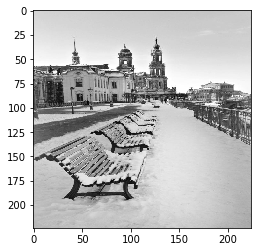

[[('n03891251', 'park_bench', 0.9998617)]]


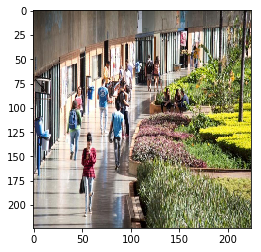

[[('n04335435', 'streetcar', 0.8832073)]]


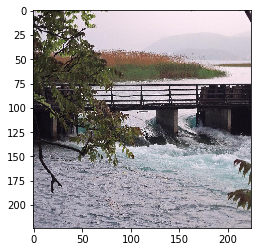

[[('n03160309', 'dam', 0.97911376)]]


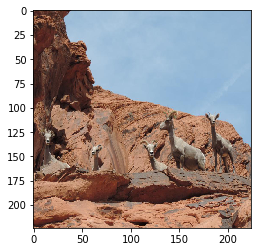

[[('n09246464', 'cliff', 0.95962083)]]


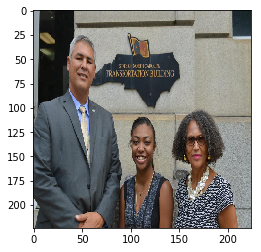

[[('n04350905', 'suit', 0.899286)]]


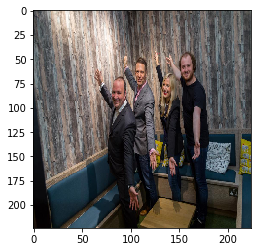

[[('n04005630', 'prison', 0.12591718)]]


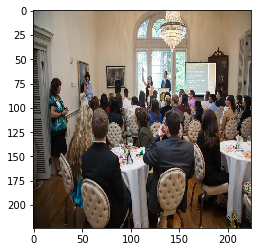

[[('n04081281', 'restaurant', 0.463572)]]


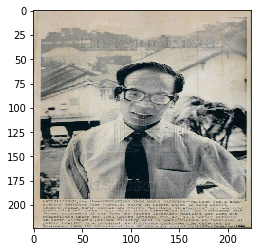

[[('n02883205', 'bow_tie', 0.99998343)]]


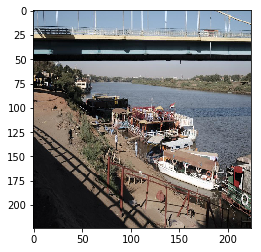

[[('n03933933', 'pier', 0.6244987)]]


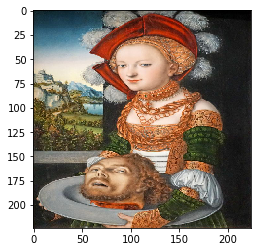

[[('n02869837', 'bonnet', 0.99998593)]]
Total time taken for object detection on 10 images:  7.562479734420776


In [6]:
#Call predict function, calculate time to predict
start = time.time()
predictions = model_predict(loadimages)
end = time.time()
print("Total time taken for object detection on",len(loadimages),"images: ",(end-start))

In [7]:
#instantiate object from ImageAI
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
weights_path = "resnet50_coco_best_v2.0.1.h5"
detector.setModelPath(weights_path)
detector.loadModel()
load_images = glob.glob('input_images/*')

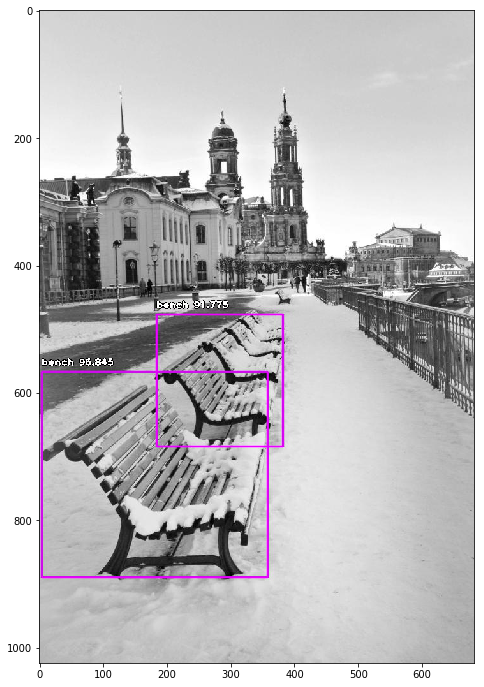

Labels Detected: 
bench, 0.9 | bench, 1.0 | 

Prediction String: 
bench 0.9177451133728027 0.1 0.1 0.9 0.9 bench 0.9684498310089111 0.1 0.1 0.9 0.9 


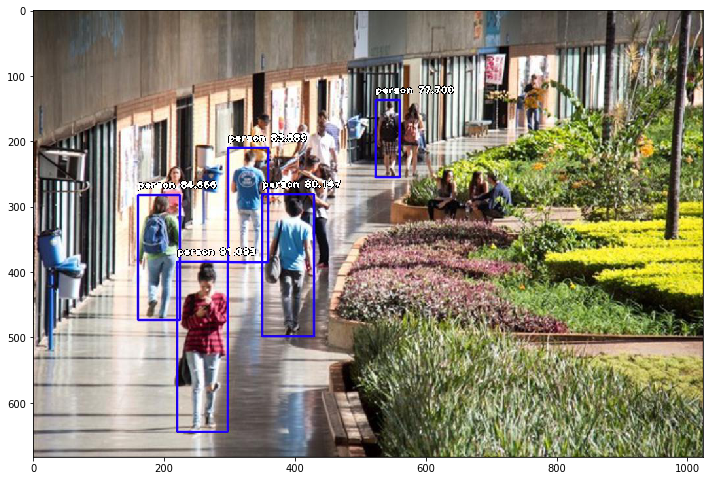

Labels Detected: 
person, 0.8 | person, 0.8 | person, 0.8 | person, 0.8 | person, 0.9 | 

Prediction String: 
person 0.7769995331764221 0.1 0.1 0.9 0.9 person 0.8388902544975281 0.1 0.1 0.9 0.9 person 0.8466576933860779 0.1 0.1 0.9 0.9 person 0.8014732599258423 0.1 0.1 0.9 0.9 person 0.9109250903129578 0.1 0.1 0.9 0.9 


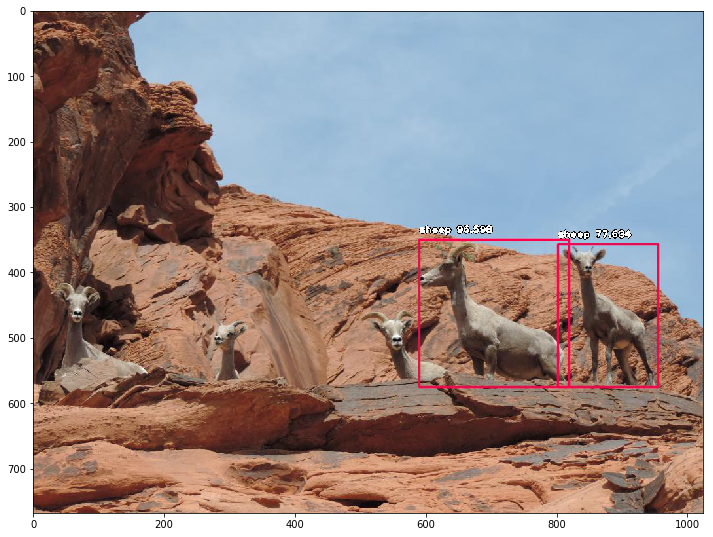

Labels Detected: 
sheep, 1.0 | sheep, 0.8 | 

Prediction String: 
sheep 0.9659842252731323 0.1 0.1 0.9 0.9 sheep 0.7763427495956421 0.1 0.1 0.9 0.9 


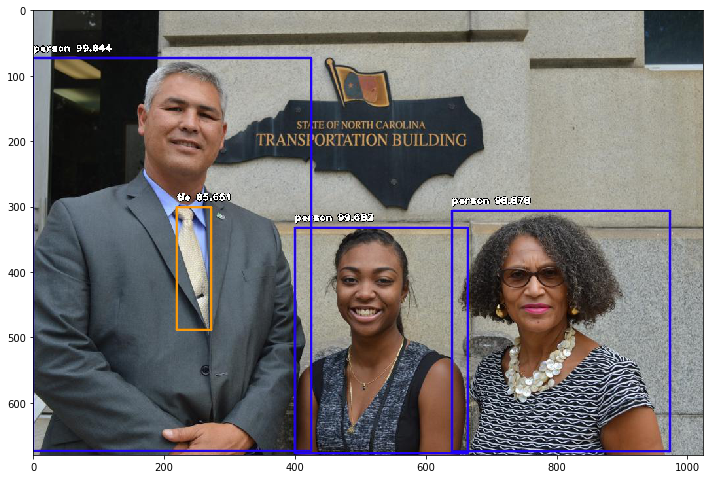

Labels Detected: 
tie, 0.9 | person, 1.0 | person, 1.0 | person, 1.0 | 

Prediction String: 
tie 0.8565121293067932 0.1 0.1 0.9 0.9 person 0.9968185424804688 0.1 0.1 0.9 0.9 person 0.9984427094459534 0.1 0.1 0.9 0.9 person 0.988781750202179 0.1 0.1 0.9 0.9 


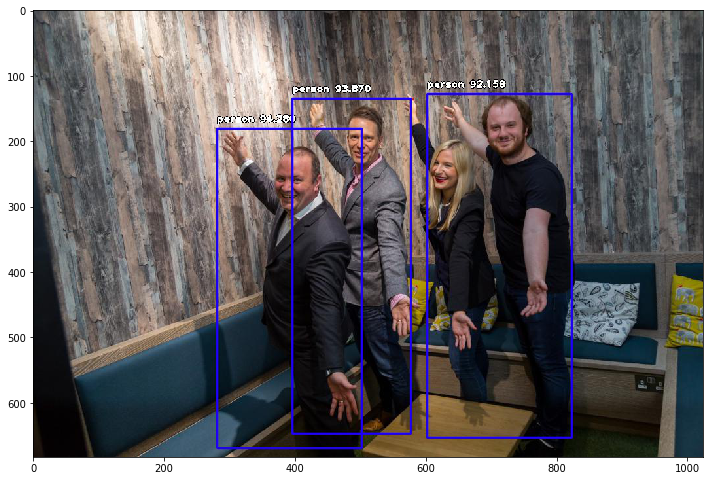

Labels Detected: 
person, 0.9 | person, 0.9 | person, 0.9 | 

Prediction String: 
person 0.9427995681762695 0.1 0.1 0.9 0.9 person 0.9386991262435913 0.1 0.1 0.9 0.9 person 0.9215840101242065 0.1 0.1 0.9 0.9 


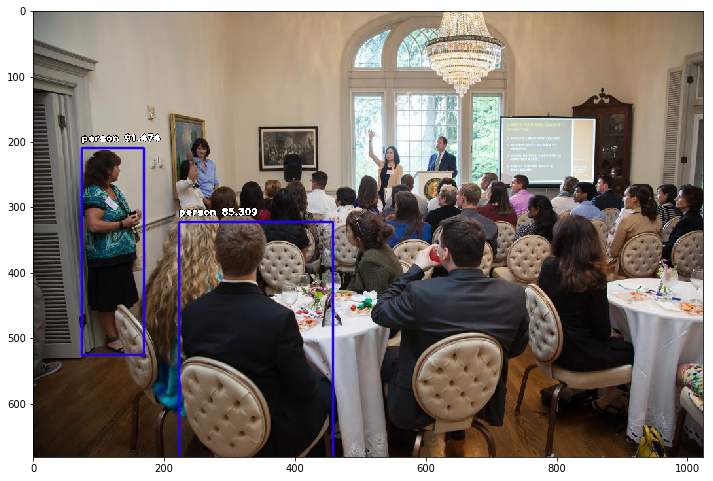

Labels Detected: 
person, 0.9 | person, 0.9 | 

Prediction String: 
person 0.9147427082061768 0.1 0.1 0.9 0.9 person 0.8530882596969604 0.1 0.1 0.9 0.9 


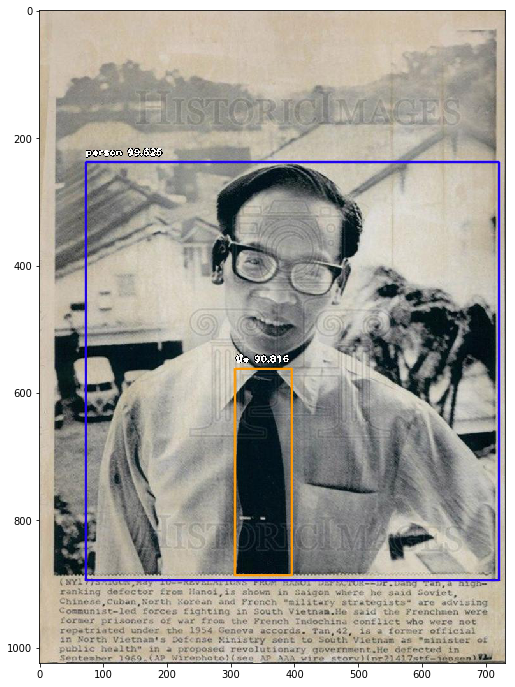

Labels Detected: 
tie, 0.9 | person, 1.0 | 

Prediction String: 
tie 0.9081649780273438 0.1 0.1 0.9 0.9 person 0.9962496161460876 0.1 0.1 0.9 0.9 


In [8]:
for n_epochs in range(1):
    for image in load_images:
        image = image.replace("input_images", "")
        image = image.strip(image[0])
        detections = detector.detectObjectsFromImage(input_image= os.path.join(image_path,image),
                                                     output_image_path=os.path.join(output_path,image), minimum_percentage_probability = 75) 
        pred_str = ""
        labels = ""
        for eachObject in detections:    
            
                pred_str += eachObject["name"] + " " + str(float(eachObject["percentage_probability"])/100) + " 0.1 0.1 0.9 0.9"
                pred_str += " "
                labels += eachObject['name'] + ", " + str(round(float(eachObject['percentage_probability'])/100, 1)) 
                labels += " | "
        if labels != "":
            plt.figure(figsize=(12,12))
            plt.imshow(plt.imread('output_images/'+image))
            plt.show()

            print ("Labels Detected: ")
            print (labels)
            print ()
            print ("Prediction String: ")
            print (pred_str)
